In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from src.models.lbcnn.axial_lbcnn import SmallAxialUNetLBC, AxialUNetLBC
from src.models.lbcnn.axial_unet import AxialUNet, SmallAxialUNet
from src.models.lbcnn.lbc_unet import UNetLBP, SmallUNetLBP
from src.models.unet.unet_model import UNet, SmallUNet

In [28]:
def load_json_metrics(file_path):
    with open(file_path, 'r') as fp:
        metrics = json.load(fp)
    return metrics

def plot_json(json_dict, name, ax):
    ax.plot(list(json_dict.keys()), list(json_dict.values()), label=name)
    
def get_mean_metric(metric_dict, from_epoch, to_epoch=None):
    df = pd.DataFrame.from_dict(metric_dict, orient='index')
    return df[from_epoch:to_epoch].mean().item()

def get_n_params(model, verbose=False):
    pytorch_total_params = sum(p.numel() for p in model.parameters())
    if verbose:
        print('Total Params: ', pytorch_total_params)

    params = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            params += param.numel()
    if verbose:
        print('Trainable Params: ', params)
    return pytorch_total_params, params

### IoU Metrics

In [16]:
# UNet
unet = load_json_metrics('/home/dsola/repos/PGA-Net/results/frosty_sponge_239_unet_ice-mean-iou-epoch.json')

# Small UNet
small_unet = load_json_metrics('/home/dsola/repos/PGA-Net/results/laced_disco_238_small_unet_ice-mean-iou-epoch.json')

# Axial UNet
axial_unet = load_json_metrics('/home/dsola/repos/PGA-Net/results/fiery_blaze_231_full_axial_unet_ice_64_channels-mean-iou-epoch-128-256-size.json')

# Small Axial UNet
small_axial_unet = load_json_metrics('/home/dsola/repos/PGA-Net/results/soft_waterfall_230_small_axial_unet_ice_64_channels-mean-iou-epoch-128-256-size.json')

# LBC UNet
lbc_unet = load_json_metrics('/home/dsola/repos/PGA-Net/results/worthy_wood_227_lbc_unet_ice-mean-iou-epoch-128-256-size.json')

# Small LBC UNet
small_lbc_unet = load_json_metrics('/home/dsola/repos/PGA-Net/results/sandy_moon_228_small_lbc_unet_ice-mean-iou-epoch-128-256-size.json')

# Basic Axial Net
basic_axial_net = load_json_metrics('/home/dsola/repos/PGA-Net/results/vocal_dragon_242_basic_axial_lbc_ice-mean-iou-epoch.json')

# Large Axial Net
large_axial_net = load_json_metrics('//home/dsola/repos/PGA-Net/results/rare_flower_241_large_axial_lbc_ice-mean-iou-epoch.json')

# Axial LBC UNet
axial_lbc_unet = load_json_metrics('/home/dsola/repos/PGA-Net/results/avid_night_179_axial_unet_lbc_ice-mean-iou-epoch.json')

# Small Axial LBC UNet
small_axial_lbc_unet = load_json_metrics('/home/dsola/repos/PGA-Net/results/glamorous_breeze_180_small_axial_unet_lbc_ice-mean-iou-epoch.json')

metric_dicts = {
    'unet': unet, 
    'small_unet': small_unet, 
    'axial_unet': axial_unet,
    'small_axial_unet': small_axial_unet, 
    'lbc_unet': lbc_unet, 
    'small_lbc_unet': small_lbc_unet,
#     'basic_axial_net': basic_axial_net,
#     'large_axial_net': large_axial_net,
    'axial_lbc_unet': axial_lbc_unet, 
    'small_axial_lbc_unet': small_axial_lbc_unet
}

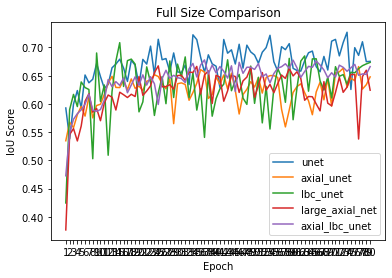

In [4]:
fig, ax = plt.subplots()

ax.set_ylabel('IoU Score')
ax.set_xlabel('Epoch')
plot_json(unet, 'unet', ax)
# plot_json(small_unet, 'small_unet', ax)
plot_json(axial_unet, 'axial_unet', ax)
# plot_json(small_axial_unet, 'small_axial_unet', ax)
plot_json(lbc_unet, 'lbc_unet', ax)
# plot_json(small_lbc_unet, 'small_lbc_unet', ax)
plot_json(large_axial_net, 'large_axial_net', ax)
plot_json(axial_lbc_unet, 'axial_lbc_unet', ax)
# plot_json(small_axial_lbc_unet, 'small_axial_lbc_unet', ax)
plt.legend();
ax.set_title('Full Size Comparison');

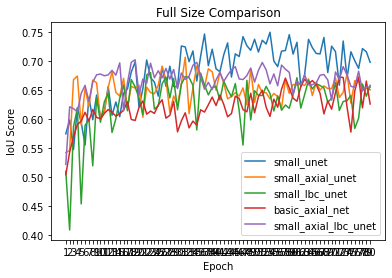

In [6]:
fig, ax = plt.subplots()

ax.set_ylabel('IoU Score')
ax.set_xlabel('Epoch')
# plot_json(unet, 'unet', ax)
plot_json(small_unet, 'small_unet', ax)
# plot_json(axial_unet, 'axial_unet', ax)
plot_json(small_axial_unet, 'small_axial_unet', ax)
# plot_json(lbc_unet, 'lbc_unet', ax)
plot_json(small_lbc_unet, 'small_lbc_unet', ax)
plot_json(basic_axial_net, 'basic_axial_net', ax)
# plot_json(axial_lbc_unet, 'axial_lbc_unet', ax)
plot_json(small_axial_lbc_unet, 'small_axial_lbc_unet', ax)
plt.legend();
ax.set_title('Full Size Comparison');

In [17]:
FROM_EPOCH = 20
avg_metric_dict = {}
for model in metric_dicts.keys():
    avg_metric_dict[model] = get_mean_metric(metric_dicts[model], FROM_EPOCH)

In [18]:
avg_metric_dict

{'unet': 0.682293904821078,
 'small_unet': 0.7044796794652939,
 'axial_unet': 0.6298791617155075,
 'small_axial_unet': 0.6532142460346222,
 'lbc_unet': 0.6352974305550257,
 'small_lbc_unet': 0.6416343748569489,
 'axial_lbc_unet': 0.6564520061016083,
 'small_axial_lbc_unet': 0.6720429321130117}

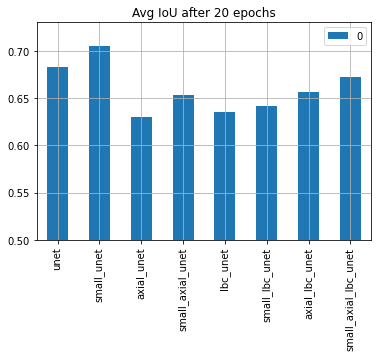

In [25]:
ax = pd.DataFrame.from_dict(avg_metric_dict, orient='index').plot.bar(ylim=(0.5, 0.73), title='Avg IoU after 20 epochs')
ax.grid();

### Model Parameters

In [9]:
unet_model = UNet(n_channels=3, n_classes=3, bilinear=True)
small_unet_model = SmallUNet(n_channels=3, n_classes=3, bilinear=True)
axial_unet_model = AxialUNet(3, 3, 64)
small_axial_unet_model = SmallAxialUNet(3, 3, 64)
lbc_unet_model = UNetLBP(3, 3)
small_lbc_unet_model = SmallUNetLBP(3, 3)
axial_lbc_unet_model = AxialUNetLBC(3, 3, 10)
small_axial_lbc_unet_model = SmallAxialUNetLBC(3, 3, 10)

models_dict = {
    'unet_model': unet_model,
    'small_unet_model': small_unet_model,
    'axial_unet_model': axial_unet_model,
    'small_axial_unet_model': small_axial_unet_model,
    'lbc_unet_model': lbc_unet_model,
    'small_lbc_unet_model': small_lbc_unet_model,
    'axial_lbc_unet_model': axial_lbc_unet_model,
    'small_axial_lbc_unet_model': small_axial_lbc_unet_model,
}

In [31]:
model_tot_param_dict, model_train_param_dict = {}, {}
for model in models_dict.keys():
#     print(model, ': ')
    tot, train = get_n_params(models_dict[model])
    model_tot_param_dict[model] = tot
    model_train_param_dict[model] = train

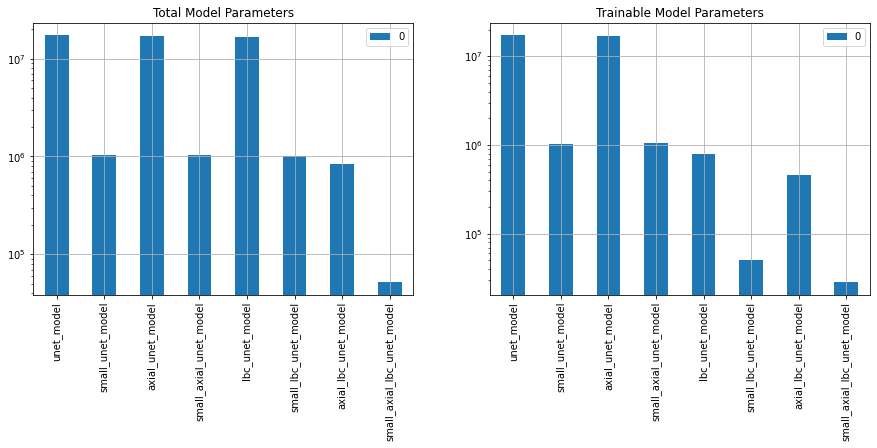

In [38]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
pd.DataFrame.from_dict(model_tot_param_dict, orient='index').plot.bar(ax=axs[0], title='Total Model Parameters', logy=True)
pd.DataFrame.from_dict(model_train_param_dict, orient='index').plot.bar(ax=axs[1], title='Trainable Model Parameters', logy=True)
axs[0].grid()
axs[1].grid();